The rows in the dataset represent patients and the columns represent information like body measurements, results from various blood tests, and lifestyle choices. You will use the dataset to explore the relationship between cardiac disease, body measurements, blood markers, and lifestyle choices.


In [150]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
df = pd.read_csv('medical_examination.csv')
df.head(5)

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


Add an overweight column to the data. To determine if a person is overweight, first calculate their BMI by dividing their weight in kilograms by the square of their height in meters. If that value is > 25 then the person is overweight. Use the value 0 for NOT overweight and the value 1 for overweight.

In [173]:
df['overweight'] = np.where((df['weight']/(df['height']/100)**2)>25, 1, 0)

Normalize data by making 0 always good and 1 always bad. If the value of 'cholesterol' or 'gluc' is 1, make the value 0. If the value is more than 1, make the value 1.

In [174]:
df['cholesterol'] = np.where(df['cholesterol'] > 1, 1, 0)
df['gluc'] =  np.where(df['gluc'] > 1, 1, 0)

Create DataFrame for using `pd.melt` using just the values from 'cholesterol', 'gluc', 'smoke', 'alco', 'active', 'overweight'.
Convert the data into long format and create a chart that shows the value counts of the categorical features using seaborn's catplot(). The dataset should be split by 'Cardio' so there is one chart for each cardio value

In [154]:
df_cat = pd.melt(df, id_vars = 'cardio',value_vars = ['cholesterol','gluc','smoke', 'alco', 'active', 'overweight'])

Group and reformat the data to split it by 'cardio'. Show the counts of each feature. You will have to rename one of the columns for the catplot to work correctly.

In [155]:
df_cat = pd.DataFrame(df_cat.groupby(['variable', 'value', 'cardio'])['value'].count()).rename(columns={'value': 'total'}).reset_index()

 Draw the catplot with 'sns.catplot()'

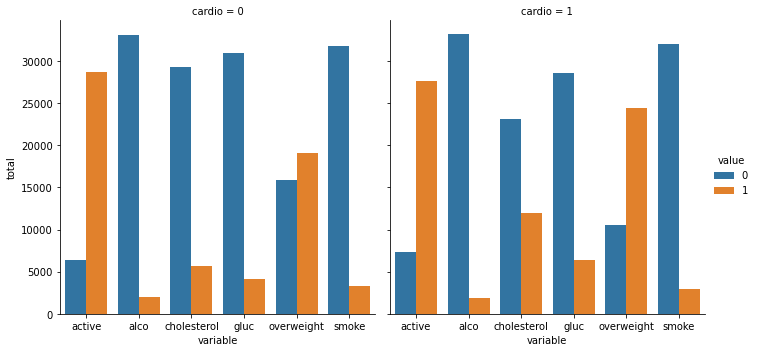

In [156]:
sns.catplot(x = 'variable',y = 'total', data = df_cat, hue = 'value', kind = 'bar', col = 'cardio')

Clean the data. Filter out the following patient segments that represent incorrect data:
diastolic pressure is higher than systolic (Keep the correct data with (df['ap_lo'] <= df['ap_hi']))
height is less than the 2.5th percentile (Keep the correct data with (df['height'] >= df['height'].quantile(0.025)))
height is more than the 97.5th percentile
weight is less than the 2.5th percentile
weight is more than the 97.5th percentile

In [175]:
df_heat = df[(df['ap_lo'] <= df['ap_hi'])
        & (df['height'] >= df['height'].quantile(0.025))
        & (df['height'] <= df['height'].quantile(0.975))
        & (df['weight'] >= df['weight'].quantile(0.025))
        & (df['weight'] <= df['weight'].quantile(0.975))]


Create a correlation matrix using the dataset. Plot the correlation matrix using seaborn's heatmap(). Mask the upper triangle.

Calculate the correlation matrix

In [180]:
corr = df_heat.corr(method = 'pearson')


Generate a mask for the upper triangle

In [179]:
mask = np.triu(corr)

Set up the matplotlib figure

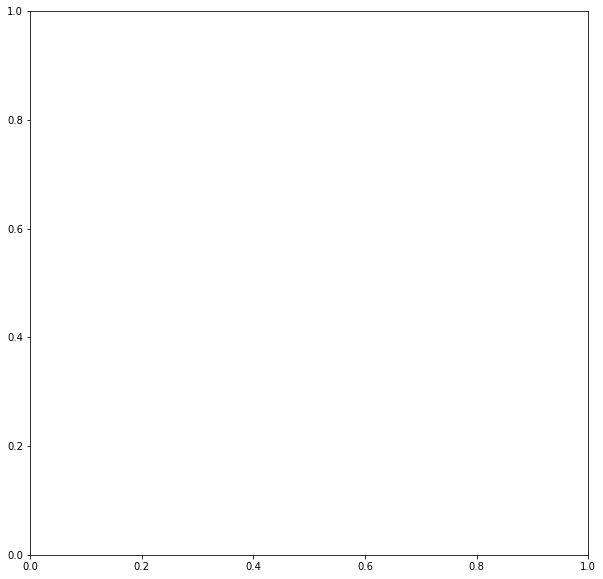

In [184]:
fig, ax = plt.subplots(figsize = (10,10))

Draw the heatmap with 'sns.heatmap()'

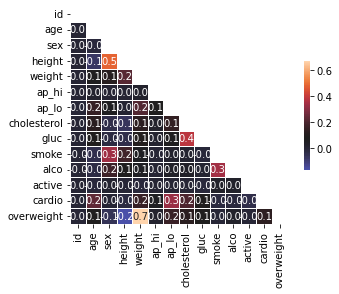

In [188]:
fig = sns.heatmap(data = corr, mask = mask, annot = True, linewidths = 1, square = True, fmt = '.1f', center = 0.08, cbar_kws = {'shrink':0.5})